# Explore here

In [148]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#Loading the dataset

url = ("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
total_data = pd.read_csv(url)
total_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [149]:
#Drop columns we don't need
new_df = X = total_data.drop(columns=["HouseAge", "AveRooms", "AveBedrms","Population", "AveOccup", "MedHouseVal"])
new_df

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


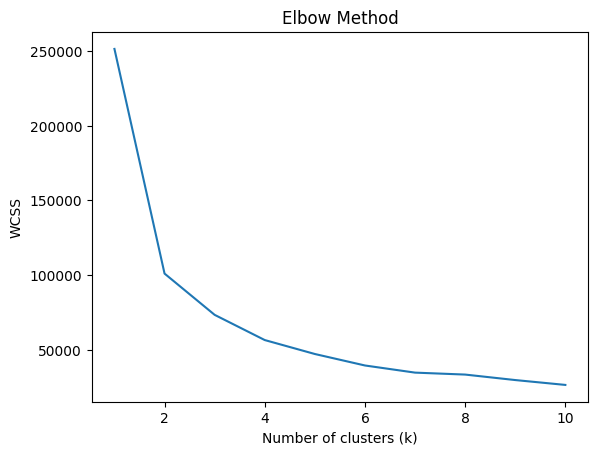

In [150]:
#Use Elbow method to find number of clusters
# Compute WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [151]:
# Apply K-Means with 4 clusters
model = KMeans(n_clusters=4, random_state=42)
model.fit(X)

KMeans(n_clusters=4, random_state=42)

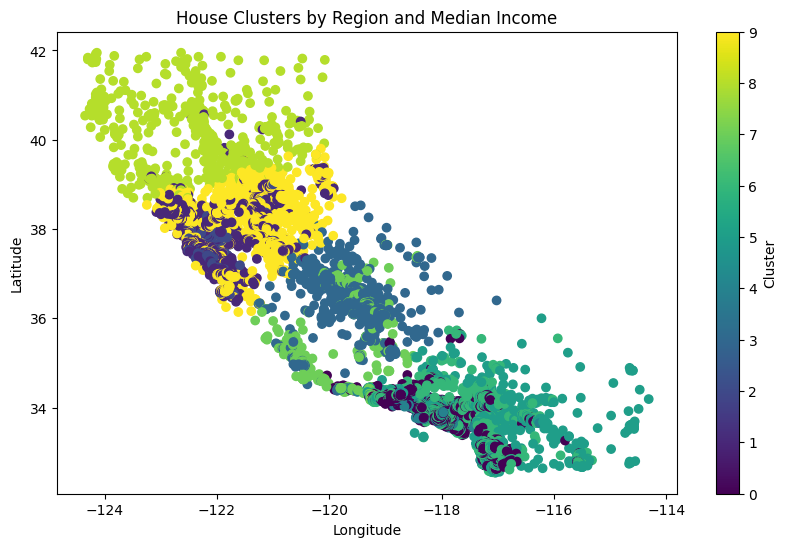

In [160]:
# # Get the labels generated from the model
# labels = kmeans.labels_

# Add the cluster labels to the dataset
new_df['cluster'] = kmeans.labels_

# Get the centroids
centroids = kmeans.cluster_centers_

# Plotting the clusters
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(new_df['Longitude'], new_df['Latitude'], c=labels, cmap='viridis', marker='o')

# Create a scatter plot for the centroids
#plt.scatter(centroids[:, 1], centroids[:, 0], c='red', marker='x', s=100, label='Centroids')


# Add title and labels
plt.title('House Clusters by Region and Median Income')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')

# Show the plot
plt.show()




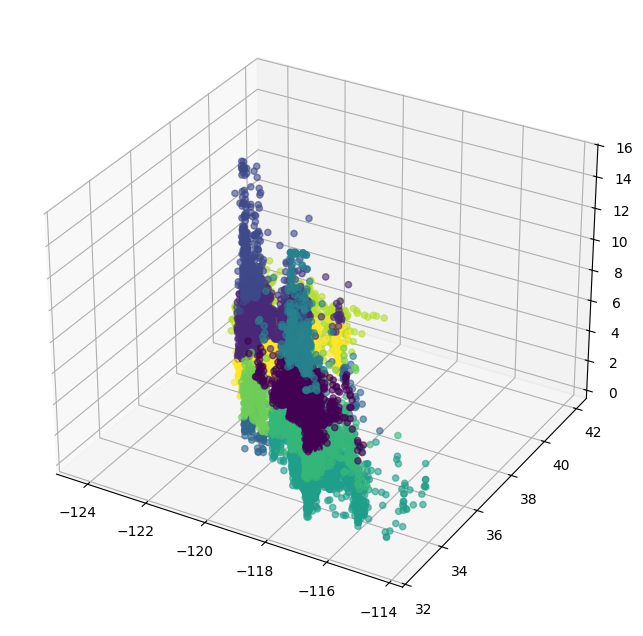

In [153]:
from mpl_toolkits.mplot3d import Axes3D

#Get the centroids
centroids = kmeans.cluster_centers_

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
sc = ax.scatter(new_df['Longitude'], new_df['Latitude'], new_df['MedInc'], c=labels, cmap='viridis', marker='o', alpha=0.6)

In [154]:
#Split the model for training and test set

from sklearn.model_selection import train_test_split

X = new_df[['Latitude', 'Longitude', 'MedInc']]
y = new_df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the K-Means model on the training set
model_fit = KMeans(n_clusters=4, random_state=42)
model_fit.fit(X_train)



KMeans(n_clusters=4, random_state=42)

In [155]:
#Train a supervised classification model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [156]:
# Predict the clusters for the test set using the DecisionTreeClassifier model
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Plotting the predicted clusters for the test set
plt.figure(figsize=(10, 6))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       429
           1       0.99      0.99      0.99       524
           2       0.99      1.00      0.99        88
           3       0.98      0.96      0.97       246
           4       1.00      1.00      1.00        74
           5       1.00      0.99      0.99       808
           6       0.99      0.99      0.99       945
           7       0.97      0.93      0.95       119
           8       0.98      0.95      0.97       161
           9       0.98      0.99      0.99       734

    accuracy                           0.99      4128
   macro avg       0.99      0.98      0.98      4128
weighted avg       0.99      0.99      0.99      4128



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [159]:
num_classes = len(np.unique(y))
num_classes

10

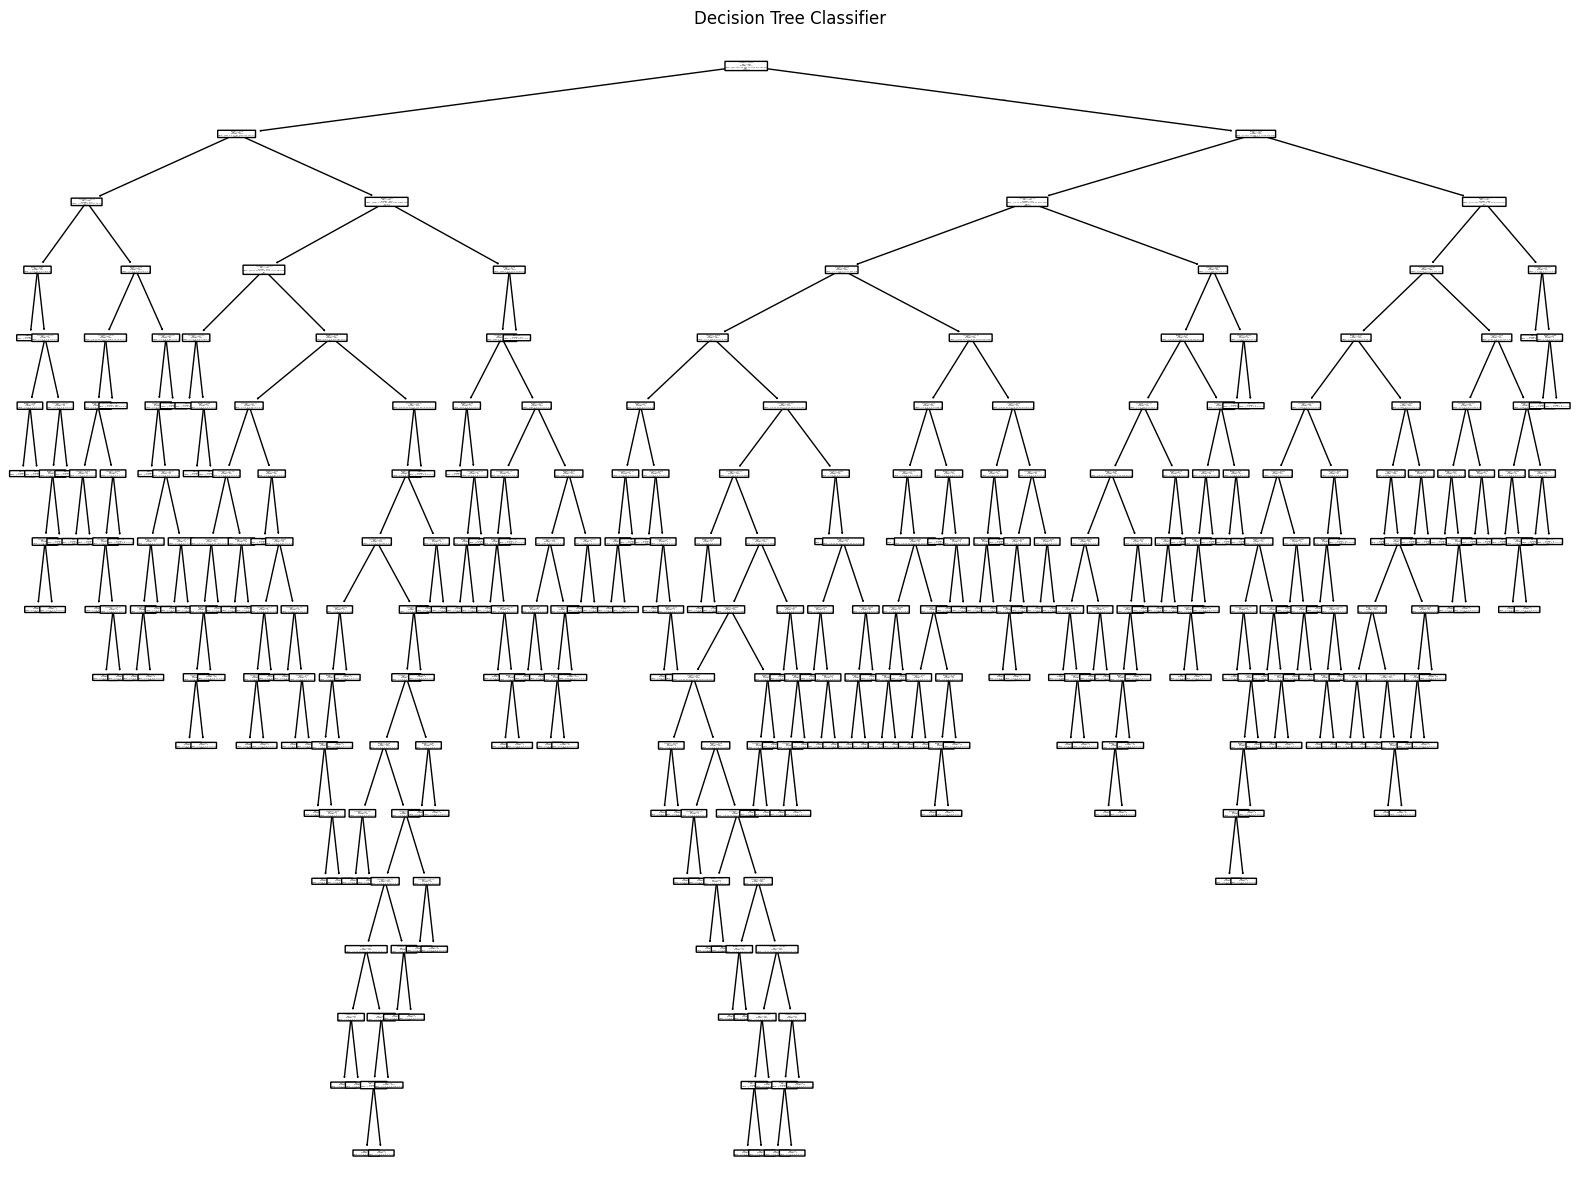

In [161]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(model, feature_names=list(X_train.columns), class_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rounded=True)
plt.title('Decision Tree Classifier')
plt.show()

In [163]:
y_pred = model.predict(X_test)
y_pred

array([3, 3, 9, ..., 2, 3, 6], dtype=int32)

I feel I did somethin wrong in m coding but I can't figure it out. My output does not match the solutions. I'm not sure what the output means here and what I can interpret from the model. Not sure why my tree is so large and why I have so many classes for y (10).